# Feature Extraction
### Manually combing and dropping features

In [3]:
import pandas as pd
sales_df = pd.read_csv('grocery_sales.csv')
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [4]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] =  sales_df.revenue / sales_df.quantity

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['quantity','revenue'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


## Principal Component Analysis (PCA)
- must scale values before doing PCA

In [35]:
# Load data
df = pd.read_csv('ansur.csv')

# Drop non-numeric features
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur = df.drop(non_numeric, axis=1)

# Standardize the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ansur_std = pd.DataFrame(scaler.fit_transform(ansur), columns=ansur.columns)

In [36]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate and fit
pca = PCA(n_components=10)
pca.fit(ansur_std)

# Transform and convert back to df
pc_df = pd.DataFrame(pca.transform(ansur_std), columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

# Print explained variance of components
print(pca.explained_variance_ratio_)

# Print cumulative explained variance of components
print(pca.explained_variance_ratio_.cumsum())

[0.55636331 0.13088413 0.05079997 0.03158418 0.02103663 0.01605557
 0.01368203 0.01149335 0.01094963 0.00979305]
[0.55636331 0.68724745 0.73804741 0.76963159 0.79066822 0.80672379
 0.82040582 0.83189916 0.84284879 0.85264184]


In [23]:
pc_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-3.461149,1.578522,-0.767117,-0.863034,-1.031154,1.831217,-0.561315,-0.388176,0.163800,-0.650647
1,0.908606,2.023799,-1.121332,0.737089,-0.515467,-0.765592,0.936870,-1.009320,2.195146,-1.051748
2,-5.670959,-1.187340,-1.081047,1.209667,-0.733629,-1.922260,0.759209,0.386121,1.160958,-1.291479
3,0.828574,-2.452733,-4.811107,-0.261512,0.365341,-1.066272,-0.589017,0.638918,0.264330,-0.147586
4,-15.131266,8.164413,4.319217,2.489092,0.340849,-2.909910,1.831549,-1.882372,0.499723,1.088380


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

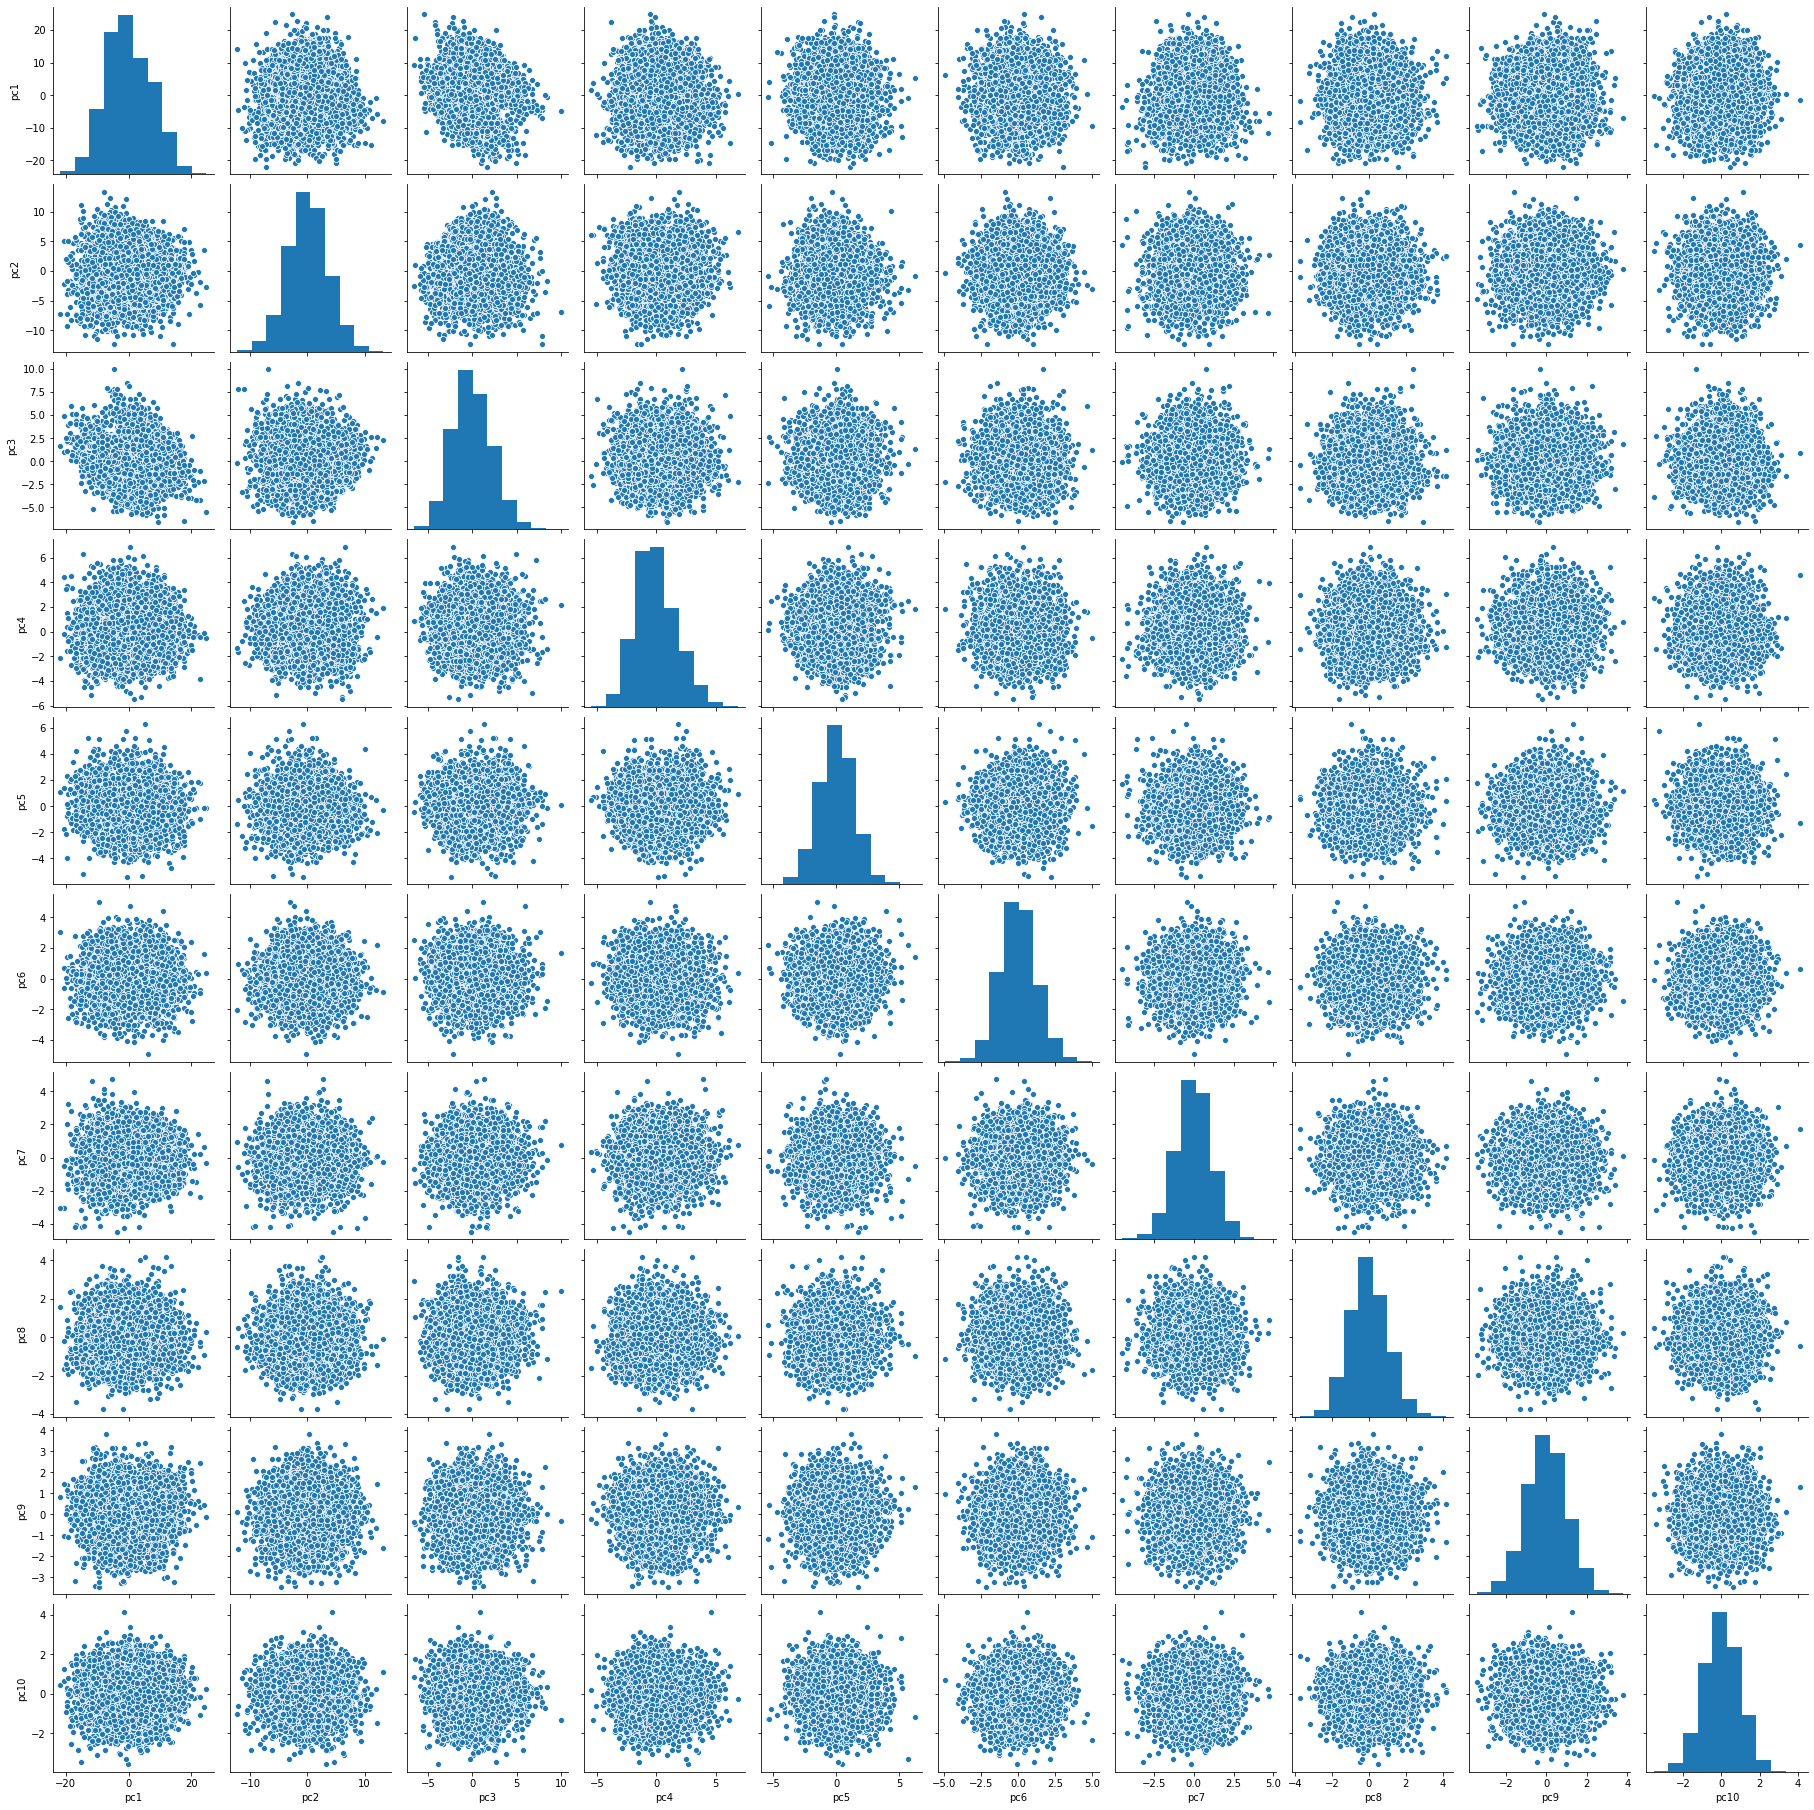

In [24]:
sns.pairplot(pc_df)

In [32]:
# Load data
df = pd.read_csv('ansur.csv')

# Drop non-numeric features
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur = df.drop(non_numeric, axis=1)

# Standardize the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ansur_std = pd.DataFrame(scaler.fit_transform(ansur), columns=ansur.columns)

# Import PCA
from sklearn.decomposition import PCA

# Instantiate and fit
pca = PCA()
pca.fit(ansur_std)

# Create a list of column names
labels = []
r = range(1,95)

for i in r:
    labels.append('PC {}'.format(i))

# Transform and rename the columns in the pc_df
pc_df = pd.DataFrame(pca.transform(ansur_std), columns=labels)

pc_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 85,PC 86,PC 87,PC 88,PC 89,PC 90,PC 91,PC 92,PC 93,PC 94
0,-3.461149,1.578522,-0.767114,-0.863019,-1.030262,1.832711,-0.551765,-0.346226,0.224499,-0.638908,...,-0.027835,0.023932,0.045339,-0.094692,-0.125202,-0.127269,-0.113080,-0.040424,-0.056465,0.011114
1,0.908606,2.023799,-1.121336,0.737036,-0.516295,-0.766464,0.934102,-0.982062,2.197530,-0.993127,...,0.070127,0.015143,-0.061736,-0.185291,-0.029044,-0.029544,-0.055015,0.039593,0.036290,0.032497
2,-5.670959,-1.187340,-1.081043,1.209684,-0.732828,-1.921046,0.768858,0.440973,1.194392,-1.295119,...,-0.161035,0.098720,-0.108305,-0.120842,0.017535,-0.063688,0.038667,-0.066661,-0.002448,-0.072105
3,0.828574,-2.452733,-4.811108,-0.261529,0.365360,-1.065683,-0.582408,0.665867,0.285978,-0.126687,...,0.032616,0.032708,0.053764,-0.221073,0.072391,0.030097,-0.010904,-0.012441,0.050621,0.009858
4,-15.131266,8.164413,4.319223,2.489103,0.341943,-2.908147,1.833579,-1.857026,0.545700,1.057097,...,-0.084955,-0.117283,-0.033489,-0.060325,0.166284,-0.063419,0.014521,0.018998,-0.019200,-0.010717


## PCA Applications

In [39]:
# Load data
df = pd.read_csv('ansur.csv')

# Drop non-numeric features
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur = df.drop(non_numeric, axis=1)

# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create Pipeline to scale and reduce the data
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA())])

# Fit and transform data
pc = pipe.fit_transform(ansur)

#### Checking the effect of categorical features

<ipython-input-48-5ae6f9456770>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ansur_categories['PC 1'] = pc[:,0]
<ipython-input-48-5ae6f9456770>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ansur_categories['PC 2'] = pc[:,1]


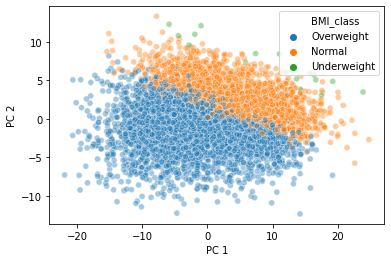

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

ansur_categories = df[non_numeric]
ansur_categories['PC 1'] = pc[:,0]
ansur_categories['PC 2'] = pc[:,1]
sns.scatterplot(data=ansur_categories,
                x='PC 1', y='PC 2',
                hue='BMI_class', alpha=0.4)

### Adding a model to the PCA pipeline

In [66]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

SEED = 830

# Load the data
df = pd.read_csv('ansur.csv')

# Drop non-numeric features
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur = df.drop(non_numeric, axis=1)

# Assign target and predictors
y = df.Gender
X = ansur

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state= SEED)

# Create Pipeline to scale and reduce the data
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=3)),
                 ('classifier', RandomForestClassifier())])

# Fit
pipe.fit(X_train, y_train)

print('Model Accuracy on test data: {}'.format(pipe.score(X_test, y_test)))

Model Accuracy on test data: 0.990112063282795


## Principal Component Selection
- if you pass a decimal (percentage) to the n_components parameter, the PCA model will keep enough components to retain that amount of variance

In [73]:
# Create Pipeline to scale and reduce the data
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.9))])

# Fit
pipe.fit(ansur)

print('Components Kept to retain 90% variance: {}'.format(len(pipe.steps[1][1].components_)))

Components Kept to retain 90% variance: 17


### Scree-Plots

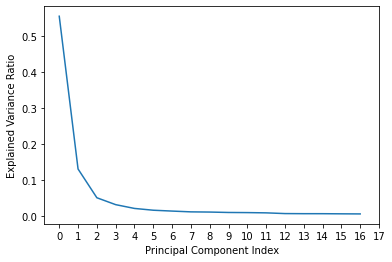

In [76]:
var = pipe.steps[1][1].explained_variance_ratio_

plt.plot(var)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0,(len(var)+1)))
plt.show()

based on above, you may choose to only select 3 Principal Components

In [79]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

SEED = 830

# Load the data
df = pd.read_csv('ansur.csv')

# Drop non-numeric features
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur = df.drop(non_numeric, axis=1)

In [81]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=.9))])

# Fit the pipe to the data
pipe.fit(ansur)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

17 components selected


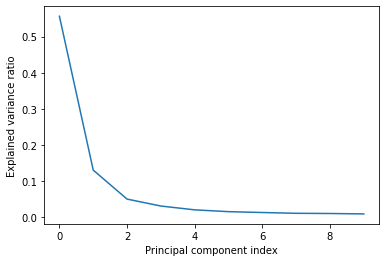

In [82]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()